### Baseline experiment

Experiment to compare the 4 Optimization algorithms before trying to improve sparse search

In [1]:
import HPO

import pysgpp

import matplotlib.pyplot as plt

import tensorflow as tf

import sklearn.metrics

from sklearn.model_selection import KFold

import numpy as np
import keras
from keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2

from sklearn.preprocessing import OneHotEncoder, StandardScaler


VERBOSE = 1
CV = 3 #[(slice(None), slice(None))]
TESTING = True

DATASETS = []

GRID_RESULT = []
RANDOM_RESULT = []
BAYESIAN_RESULT = []
SPARSE_RESULT = []
SPARSE_RESULT_OPTIMIZED = []

GRID_COST = []
RANDOM_COST = []
BAYESIAN_COST = []
SPARSE_COST = []
SPARSE_COST_OPTIMIZED = []

2023-05-05 11:46:28.012899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 11:46:29.336731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Hyperparameter space definition

In [2]:
ITER = 10

hyperparameterspace = {
    'epochs': ["interval-int", 1, 40],
    'batch_size': ["interval-int", 1, 200],
    'learning_rate': ["interval-log", 0.000000001, 0.1],
    #'number_layers': ["interval-int", 1, 20],
    #'neurons_per_layer': ["interval-int", 1, 50]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste



### Model definition

In [3]:
def relu_advanced(x):
    return K.relu(x)


ACTIVATION_FUNCTION = relu_advanced

INITIALIZER = tf.keras.initializers.RandomNormal(stddev=0.05, seed=42)


def create_model(learning_rate=0.0001, input_dim=10, number_layers=1, neurons_per_layer=20):
    # create model
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation=ACTIVATION_FUNCTION,
                    kernel_initializer=INITIALIZER, bias_initializer=INITIALIZER))
    for _ in range(number_layers):
        model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation=ACTIVATION_FUNCTION,
                        kernel_initializer=INITIALIZER, bias_initializer=INITIALIZER))
    model.add(Dense(1, activation=None))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


### Optimization

######################################################################################################################################################
Current Dataset: 1 of 5 with id: 233211
The average value for target is: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])

################################################## Current Budget: 1 ##################################################

Performing grid search


2023-05-05 11:46:33.165809: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


With Hyperparameters: 
epochs: 20
batch_size: 100
learning_rate: 9.999999999999997e-06
number_layers: 10
neurons_per_layer: 25
Best score with Grid search: 0.8895593384901682

Performing random search
With Hyperparameters: 
epochs: 8
batch_size: 173
learning_rate: 0.00026103631078009613
number_layers: 12
neurons_per_layer: 45
Best score with Random search: 0.40958990653355914

Performing bayesian optimization
Iterations took 63.27841012299905 seconds
With Hyperparameters: 
epochs: 22.0
batch_size: 82.0
learning_rate: 3.95366385540421e-06
number_layers: 9.0
neurons_per_layer: 49.0
Best score with Bayesian Optimization: 0.4630247950553894

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 46833ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.7007699211438497
Optimizing (gradient descent)...
Done in 0ms.

O

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 3414.2798302250303 seconds
With Hyperparameters: 
epochs: 18.36898309177212
batch_size: 144.7823569070192
learning_rate: 0.0008397781234485338
number_layers: 2.0590114803723147
neurons_per_layer: 24.55986432904903
Best score with Bayesian Optimization: 0.1978485013047854

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 3375071ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 100.5
learning_rate: 0.0001
number_layers: 5.75
neurons_per_layer: 25.5
Resulting loss:
0.22318706413110104
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 22.93787726562922
batch_size: 111.79085409008533
learning_rate: 0.0001
number_layers: 6.353112458126923
neurons_per_layer: 28.01950872259076
Resulting loss (Optimal value from optimization):
-0.38966157634694426
Resulting loss (Optimal point evaluated):
0.26500919957955676
Best score with Sparse Searc

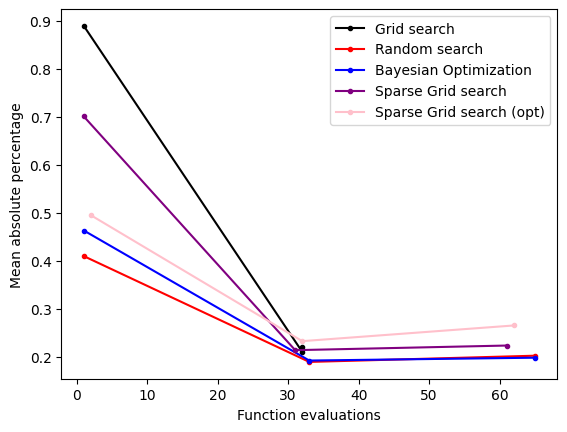

######################################################################################################################################################
Current Dataset: 2 of 5 with id: 359952
The average value for target is: tensor([50076.3906])
Min target: tensor([0.]) Max target: tensor([500001.])

################################################## Current Budget: 1 ##################################################

Performing grid search
With Hyperparameters: 
epochs: 20
batch_size: 100
learning_rate: 9.999999999999997e-06
number_layers: 10
neurons_per_layer: 25
Best score with Grid search: 0.6458710630734762

Performing random search
With Hyperparameters: 
epochs: 16
batch_size: 150
learning_rate: 0.0020747826254088465
number_layers: 9
neurons_per_layer: 18
Best score with Random search: 0.647651215394338

Performing bayesian optimization
Iterations took 16.190931855002418 seconds
With Hyperparameters: 
epochs: 31.0
batch_size: 179.0
learning_rate: 2.597598589668518e-08
number_laye

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 1018.6213233470189 seconds
With Hyperparameters: 
epochs: 6.0
batch_size: 143.0
learning_rate: 0.0012527985439916114
number_layers: 9.0
neurons_per_layer: 28.0
Best score with Bayesian Optimization: 0.35748011867205304

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 638269ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 5.75
neurons_per_layer: 25.5
Resulting loss:
0.32691363493601483
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 20.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 5.75
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.32691363493601483
Resulting loss (Optimal point evaluated):
0.3429028292496999
Best score with Sparse Search: 0.32691363493601483 optimized: 0.3429028292496999
[0.6458710630734762, 0.3245912790298462]
[0.6476512153943

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 1936.2545798489737 seconds
With Hyperparameters: 
epochs: 23.0
batch_size: 195.0
learning_rate: 0.0037157019858059057
number_layers: 9.0
neurons_per_layer: 49.0
Best score with Bayesian Optimization: 0.31495306889216107

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 1248681ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 30.25
batch_size: 100.5
learning_rate: 0.001
number_layers: 5.75
neurons_per_layer: 25.5
Resulting loss:
0.32274131973584486
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 30.25
batch_size: 100.5
learning_rate: 0.001
number_layers: 5.75
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.32274131973584486
Resulting loss (Optimal point evaluated):
0.33335959911346436
Best score with Sparse Search: 0.32274131973584486 optimized: 0.33335959911346436
[0.6458710630734762, 0.3245912790298462, 0.32663746

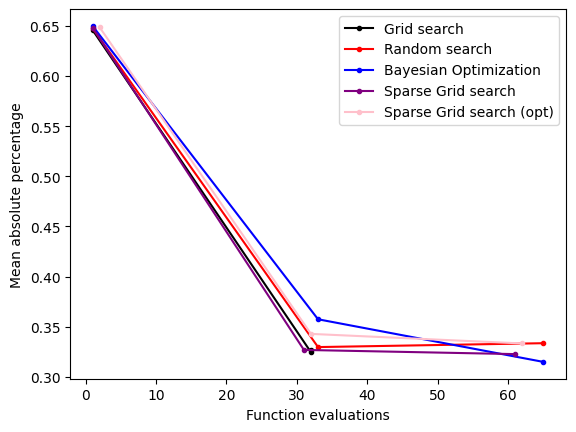

######################################################################################################################################################
Current Dataset: 3 of 5 with id: 359931
The average value for target is: tensor([15.0746])
Min target: tensor([12.5000]) Max target: tensor([17.5000])

################################################## Current Budget: 1 ##################################################

Performing grid search
With Hyperparameters: 
epochs: 20
batch_size: 100
learning_rate: 9.999999999999997e-06
number_layers: 10
neurons_per_layer: 25
Best score with Grid search: 0.04352122421065966

Performing random search
With Hyperparameters: 
epochs: 16
batch_size: 16
learning_rate: 2.0041987695530124e-05
number_layers: 7
neurons_per_layer: 28
Best score with Random search: 0.04440562675396601

Performing bayesian optimization
Iterations took 4.33968296200328 seconds
With Hyperparameters: 
epochs: 35.0
batch_size: 112.0
learning_rate: 1.162229539786433e-05
number_l

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 135.6489779389958 seconds
With Hyperparameters: 
epochs: 8.0
batch_size: 54.0
learning_rate: 2.896036591347006e-09
number_layers: 9.0
neurons_per_layer: 10.0
Best score with Bayesian Optimization: 0.04351703201731046

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 113880ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 31.625
Resulting loss:
0.04369921858112017
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 20.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 31.625
Resulting loss (Optimal value from optimization):
0.04369921858112017
Resulting loss (Optimal point evaluated):
0.0441322848200798
Best score with Sparse Search: 0.04369921858112017 optimized: 0.0441322848200798
[0.04352122421065966, 0.04367839793364207]
[0.044405626

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 251.17742653604364 seconds
With Hyperparameters: 
epochs: 10.0
batch_size: 60.0
learning_rate: 2.089133557973625e-08
number_layers: 10.0
neurons_per_layer: 24.0
Best score with Bayesian Optimization: 0.04305764784415563

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 229965ms.
Solving linear system (automatic method)...
Done in 2ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 75.625
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 37.75
Resulting loss:
0.04330105458696683
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 20.5
batch_size: 75.625
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 37.75
Resulting loss (Optimal value from optimization):
0.04330105458696683
Resulting loss (Optimal point evaluated):
0.044487364590168
Best score with Sparse Search: 0.04330105458696683 optimized: 0.044487364590168
[0.04352122421065966, 0.04367839793364207, 0.043291161

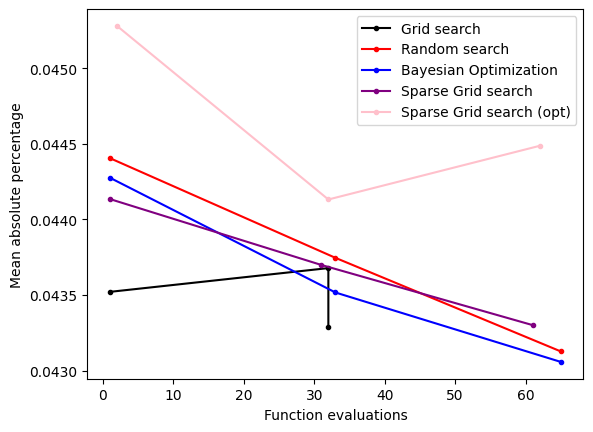

######################################################################################################################################################
Current Dataset: 4 of 5 with id: 359949
The average value for target is: tensor([540084.6250])
Min target: tensor([75000.]) Max target: tensor([7700000.])

################################################## Current Budget: 1 ##################################################

Performing grid search
With Hyperparameters: 
epochs: 20
batch_size: 100
learning_rate: 9.999999999999997e-06
number_layers: 10
neurons_per_layer: 25
Best score with Grid search: 0.4326868454615275

Performing random search
With Hyperparameters: 
epochs: 13
batch_size: 81
learning_rate: 4.530467240579702e-09
number_layers: 1
neurons_per_layer: 19
Best score with Random search: 0.43277005354563397

Performing bayesian optimization
Iterations took 26.258815891997074 seconds
With Hyperparameters: 
epochs: 10.0
batch_size: 76.0
learning_rate: 0.003111801355964465
number

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 793.2250100469537 seconds
With Hyperparameters: 
epochs: 17.003961642272493
batch_size: 155.86774575216526
learning_rate: 0.001355490456913032
number_layers: 1.4515319224151984
neurons_per_layer: 41.745660772484456
Best score with Bayesian Optimization: 0.12693900366624197

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 640140ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 37.75
Resulting loss:
0.1267019708951314
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 20.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 37.75
Resulting loss (Optimal value from optimization):
0.1267019708951314
Resulting loss (Optimal point evaluated):
0.13777631024519602
Best score with Sparse Search: 0.1267019708951314 optimized: 0.13777631024519602
[

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 2569.196235505864 seconds
With Hyperparameters: 
epochs: 23.0
batch_size: 28.0
learning_rate: 0.0006746058624654737
number_layers: 1.0
neurons_per_layer: 26.0
Best score with Bayesian Optimization: 0.12564522524674734

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 1408471ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 50.75
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 37.75
Resulting loss:
0.1251443425814311
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 20.5
batch_size: 50.75
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 37.75
Resulting loss (Optimal value from optimization):
0.1251443425814311
Resulting loss (Optimal point evaluated):
0.13540851573149362
Best score with Sparse Search: 0.1251443425814311 optimized: 0.13540851573149362
[0.4326868454615275, 0.1261508191625277, 0.1258837406833

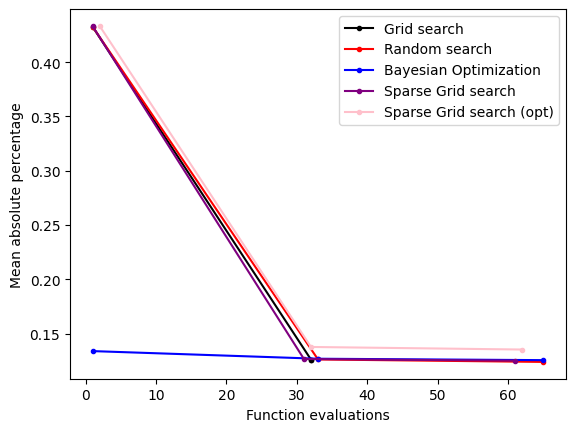

######################################################################################################################################################
Current Dataset: 5 of 5 with id: 359938
The average value for target is: tensor([5490.4849])
Min target: tensor([499.]) Max target: tensor([1120000.])

################################################## Current Budget: 1 ##################################################

Performing grid search
With Hyperparameters: 
epochs: 20
batch_size: 100
learning_rate: 9.999999999999997e-06
number_layers: 10
neurons_per_layer: 25
Best score with Grid search: 0.7080977559089661

Performing random search
With Hyperparameters: 
epochs: 16
batch_size: 87
learning_rate: 0.00014160680039501474
number_layers: 18
neurons_per_layer: 44
Best score with Random search: 0.682909349600474

Performing bayesian optimization
Iterations took 20.907794622995425 seconds
With Hyperparameters: 
epochs: 1.0
batch_size: 196.0
learning_rate: 0.0013155056471168517
number_la

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 493.6601129729097 seconds
With Hyperparameters: 
epochs: 31.96026050252591
batch_size: 126.68926725266658
learning_rate: 0.0019181237686501456
number_layers: 7.560434309883349
neurons_per_layer: 17.729163455722343
Best score with Bayesian Optimization: 0.0638499017804861

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 391887ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 20.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 5.75
neurons_per_layer: 25.5
Resulting loss:
0.07866706078251212
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 20.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 5.75
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.07866706078251212
Resulting loss (Optimal point evaluated):
0.09176051119963329
Best score with Sparse Search: 0.07866706078251212 optimized: 0.09176051119963329
[0

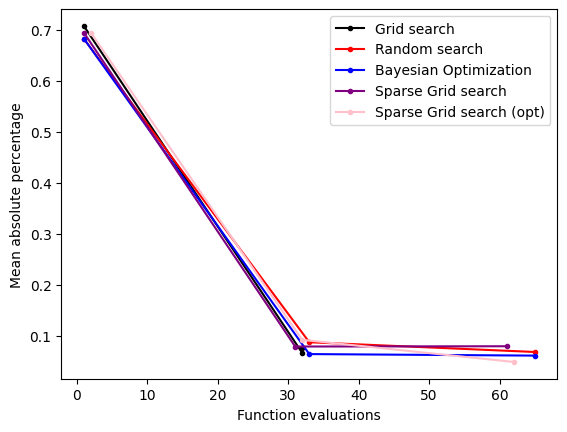

In [4]:
ids = [233211, 359952, 359931, 359949, 359938]
# [359940, 317614, 359934, 359946, 359932, 233214, 359943]

valid_datasets = 0

for i in range(len(ids)):
    print("######################################################################################################################################################")
    print("Current Dataset:", (i+1), "of", len(ids), "with id:", ids[i])

    dataset = HPO.Dataset(task_id=ids[i])

    print("The average value for target is:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    current_dataset_grid = []
    current_dataset_random = []
    current_dataset_bayesian = []
    current_dataset_sparse = []
    current_dataset_sparse_opt = []

    current_dataset_grid_cost = []
    current_dataset_random_cost = []
    current_dataset_bayesian_cost = []
    current_dataset_sparse_cost = []
    current_dataset_sparse_opt_cost = []

    ################## MODEL AND FUNCTION DEFINITION ####################

    def evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer):

        # return epochs + batch_size + learning_rate + number_of_layers + neurons_per_layer

        kfold = KFold(n_splits=CV)

        split = (kfold.split(dataset.get_X(), dataset.get_Y()))

        values = []

        numeric_features = [not x for x in dataset.get_categorical_indicator()]
        numeric_transformer = Pipeline(
            steps=[("imputer", SimpleImputer(strategy="median")),
                   ("scaler", StandardScaler())]
        )

        categorical_transformer = Pipeline(
            steps=[
                ("encoder", OneHotEncoder(
                    handle_unknown="infrequent_if_exist", sparse_output=False)),
                # ("selector", SelectPercentile(chi2, percentile=50)),
            ]
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer,
                 dataset.get_categorical_indicator()),
            ]
        )

        for i, (train_index, test_index) in enumerate(split):
            X_train = dataset.get_X()[train_index]
            Y_train = dataset.get_Y()[train_index]

            X_val = dataset.get_X()[test_index]
            Y_val = dataset.get_Y()[test_index]

            preprocessor.fit(X_train, Y_train)

            X_train = preprocessor.transform(X_train)
            X_val = preprocessor.transform(X_val)

            regressor = TransformedTargetRegressor(regressor=KerasRegressor(model=create_model,
                                                                            learning_rate=learning_rate,
                                                                            input_dim=len(
                                                                                X_train[0]),
                                                                            number_layers=number_of_layers,
                                                                            neurons_per_layer=neurons_per_layer,
                                                                            verbose=0),
                                                   transformer=StandardScaler())

            regressor.fit(X_train, Y_train, epochs=epochs,
                          batch_size=batch_size)

            Y_predicted = regressor.predict(X_val)
            # error = sklearn.metrics.mean_absolute_error(Y_predicted, Y_val)
            error = sklearn.metrics.mean_absolute_percentage_error(
                Y_predicted, Y_val)
            values.append(error)

            K.clear_session()

        result = sum(values)/len(values)
        return result

    def blackboxfunction(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        learning_rate = params[2]

        number_of_layers = 1 # int(params[3])

        neurons_per_layer = 30 # int(params[4])

        return evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer)

    def blackboxfunction_bayesian(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        model_learning_rate = 10 ** (params[2])

        number_of_layers = 1 # int(params[3])

        neurons_per_layer = 30 # int(params[4])

        return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer)

    ##################### Function for sparse grid search #####################

    class ExampleFunction(pysgpp.ScalarFunction):

        def __init__(self):
            super(ExampleFunction, self).__init__(
                len(hyperparameterspace.keys()))

        def eval(self, x):
            # index = int(x[0]*(len(hyperparameterspace_special["loss"])-1))
            # hyperparameterspace_special["loss"][index]

            epochs = int(HPO.from_standard(
                hyperparameterspace_special["epochs"][0], hyperparameterspace_special["epochs"][1], x[0]))

            batch_size = int(HPO.from_standard(
                hyperparameterspace_special["batch_size"][0], hyperparameterspace_special["batch_size"][1], x[1]))

            model_learning_rate = HPO.from_standard_log(hyperparameterspace_special["learning_rate"][
                                                        0], hyperparameterspace_special["learning_rate"][1], x[2])

            number_of_layers = 1 # int(HPO.from_standard(
                # hyperparameterspace_special["number_layers"][0], hyperparameterspace_special["number_layers"][1], x[3]))

            neurons_per_layer = 30 # int(HPO.from_standard(
                # hyperparameterspace_special["neurons_per_layer"][0], hyperparameterspace_special["neurons_per_layer"][1], x[4]))

            return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer)

    ##### For each dataset: run models with different budget #####

    for j in range(ITER):
        
        BUDGET = (j+1) * 5 #BUDGET + 2 ** len(hyperparameterspace.keys())

        print("\n################################################## Current Budget:",
              BUDGET, "##################################################")

        ############################## GRID SEARCH #######################
        print("\nPerforming grid search")

        optimization = HPO.GridSearchOptimization(
            dataset, blackboxfunction, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        print("Best score with Grid search:", best_score)

        current_dataset_grid.append(best_score)
        current_dataset_grid_cost.append(cost)

        K.clear_session()

        # ########################### RANDOM SEARCH #######################
        print("\nPerforming random search")

        optimization = HPO.RandomSearchOptimization(
            dataset, blackboxfunction, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        
        print("Best score with Random search:", best_score)

        current_dataset_random.append(best_score)
        current_dataset_random_cost.append(cost)

        K.clear_session()

        ########################### BAYESIAN OPT #####################
        print("\nPerforming bayesian optimization")

        optimization = HPO.BayesianOptimization(
            dataset, blackboxfunction_bayesian, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                elif hyperparameterspace[key][0] == "interval-log":
                    print(key + ": " + str(10 ** best_params[m]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        
        print("Best score with Bayesian Optimization:", best_score)

        current_dataset_bayesian.append(best_score)
        current_dataset_bayesian_cost.append(BUDGET)

        K.clear_session()

        ########################### SPARSE OPT ############################
        print("\nPerforming sparse search")

        f = ExampleFunction()

        optimization = HPO.SparseGridSearchOptimization(
            dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=2, adaptivity=0.95, optimizer="gradient_descent")

        result = optimization.fit()

        print("Best score with Sparse Search:", result[0][1], "optimized:", result[0][3])


        current_dataset_sparse.append(result[0][1])
        current_dataset_sparse_opt.append(result[0][3])

        current_dataset_sparse_cost.append(result[1])
        current_dataset_sparse_opt_cost.append(result[1]+1)

        K.clear_session()

        print(current_dataset_grid)
        print(current_dataset_random)
        print(current_dataset_bayesian)
        print(current_dataset_sparse)
        print(current_dataset_sparse_opt)


   

    GRID_RESULT.append(current_dataset_grid)
    RANDOM_RESULT.append(current_dataset_random)
    BAYESIAN_RESULT.append(current_dataset_bayesian)
    SPARSE_RESULT.append(current_dataset_sparse)
    SPARSE_RESULT_OPTIMIZED.append(current_dataset_sparse_opt)

    GRID_COST.append(current_dataset_grid_cost)
    RANDOM_COST.append(current_dataset_random_cost)
    BAYESIAN_COST.append(current_dataset_bayesian_cost)
    SPARSE_COST.append(current_dataset_sparse_cost)
    SPARSE_COST_OPTIMIZED.append(current_dataset_sparse_opt_cost)


    print("###################### Current dataset", ids[i], "######################")
    
    dataset = HPO.Dataset(task_id=ids[i])
    
    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    # plotting the points 
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-', color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-', color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-', color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-', color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i], '.-', color='pink', label="Sparse Grid search (opt)")
    
    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')
    
    # show a legend on the plot
    plt.legend()
    plt.savefig("Current_tests/task_id"+str(ids[i]))
    # function to show the plot
    plt.show()


### Print lines

###################### Current dataset 233211 ######################
Target average: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])


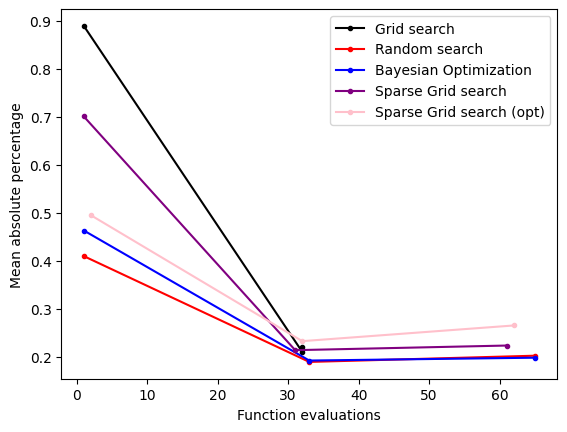

###################### Current dataset 359952 ######################
Target average: tensor([50076.3906])
Min target: tensor([0.]) Max target: tensor([500001.])


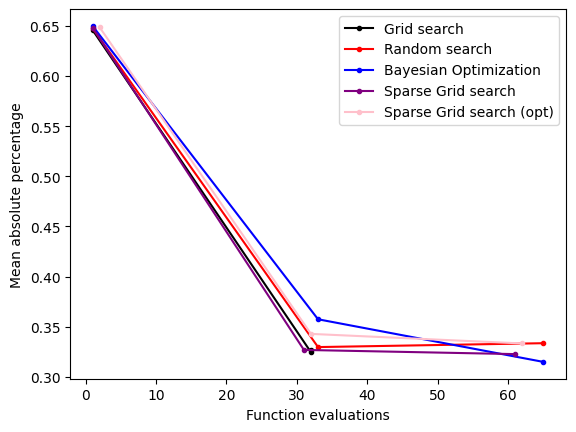

###################### Current dataset 359931 ######################
Target average: tensor([15.0746])
Min target: tensor([12.5000]) Max target: tensor([17.5000])


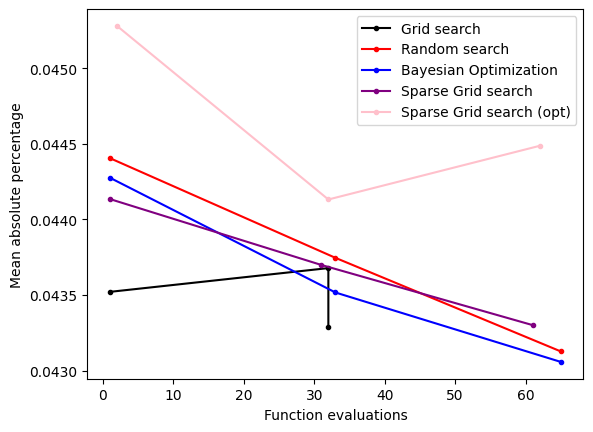

###################### Current dataset 359949 ######################
Target average: tensor([540084.6250])
Min target: tensor([75000.]) Max target: tensor([7700000.])


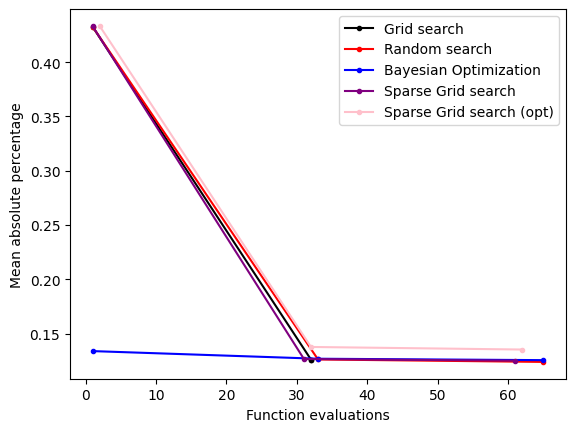

###################### Current dataset 359938 ######################
Target average: tensor([5490.4849])
Min target: tensor([499.]) Max target: tensor([1120000.])


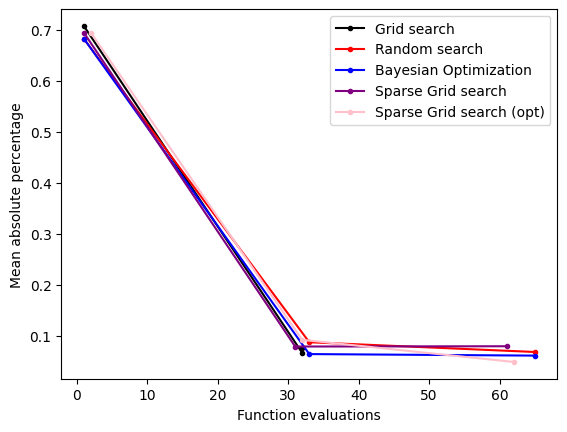

In [5]:
for i in range(len(ids)):
    print("###################### Current dataset", ids[i], "######################")
    
    dataset = HPO.Dataset(task_id=ids[i])
    
    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))


    # plotting the points 
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-', color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-', color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-', color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-', color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i], '.-', color='pink', label="Sparse Grid search (opt)")
    
    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')
    
    # show a legend on the plot
    plt.legend()
    
    # function to show the plot
    plt.show()